In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime
from scipy import signal

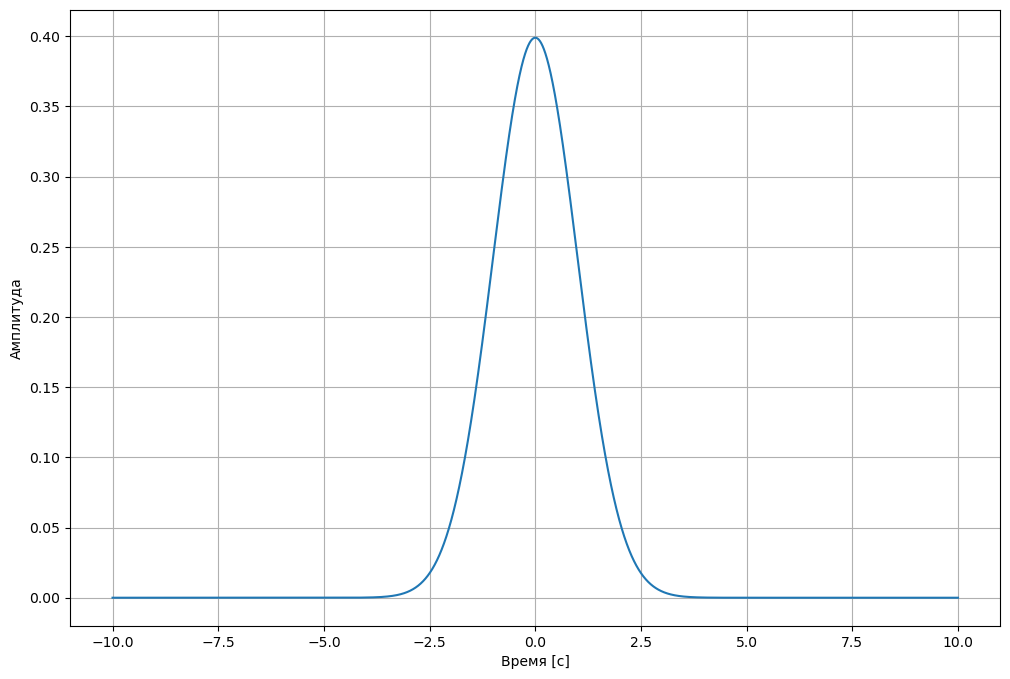

In [2]:
a1 = np.sqrt(1/2/np.pi) 
a2 = 1
Fs = 1000 
Ts = 1.0/Fs 
t0 = 0

df = pd.DataFrame()
df['t'] = np.arange(-10, 10, Ts)
## функция Гаусса
df['y'] = a1 * np.exp(-(df.t-t0)**2/2/a2)


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y)
ax.set_xlabel('Время [c]')
ax.set_ylabel('Амплитуда')
ax.grid()

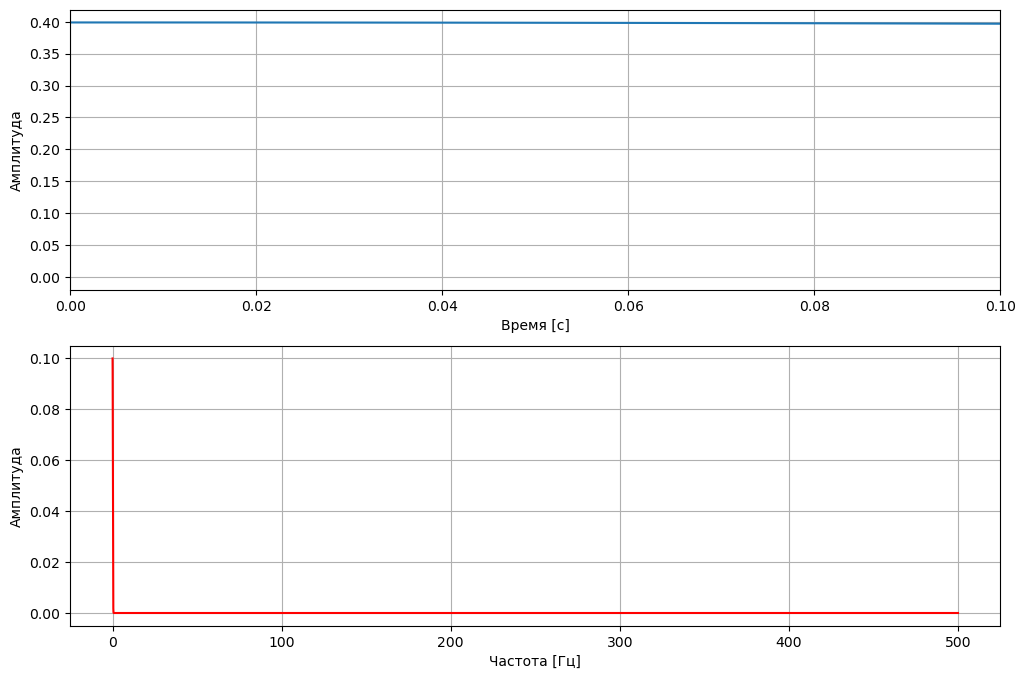

In [3]:
N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
frq = frq[range(int(N/2))]

## делаем преобразование Фурье
Y = 2/N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
Y = Y[range(int(N/2))]

## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
ax[0].set_xlim([0, 0.1])
ax[0].set_xlabel('Время [c]')
ax[0].set_ylabel('Амплитуда')
ax[0].grid()

ax[1].plot(frq, abs(Y), 'r') 
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
# ax[1].set_xlim([-200, 200])
ax[1].grid()

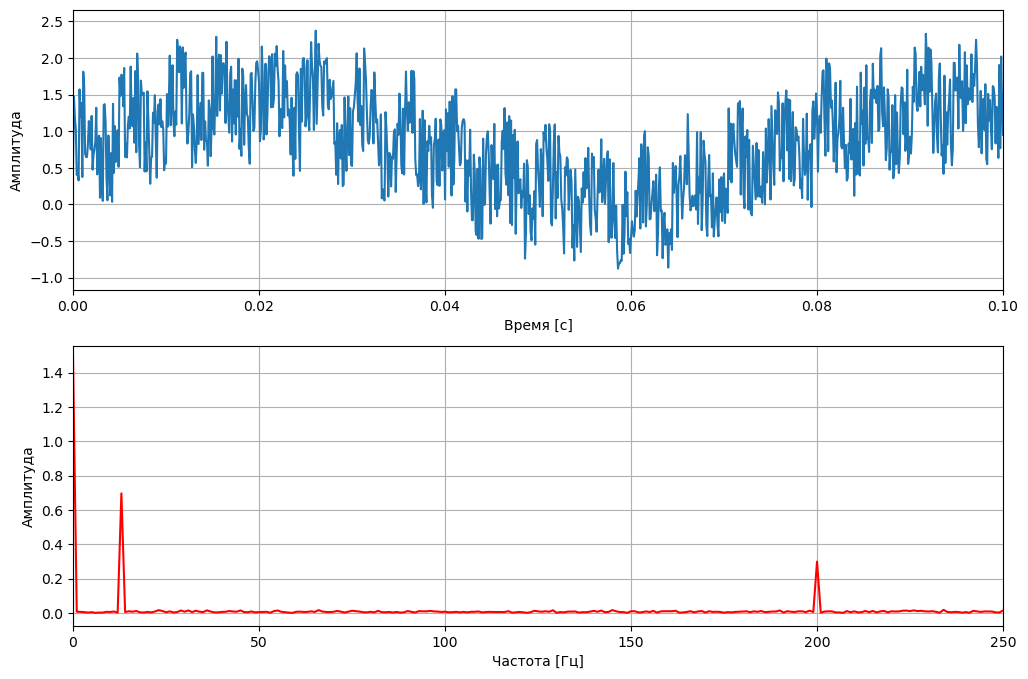

In [4]:
w1 = 13   ## частота первого синуса
w2 = 200  ## частота второго синуса
a1 = 0.7  ## амплитуда первого синуса
a2 = 0.3  ## амплитуда второго синуса
a3 = 1.5  ## амплитуда шума
Fs = 10000  ## частота дискретизации: 10 кГц
Ts = 1.0/Fs ## интервал времени между соседними точками

np.random.seed(42)

df = pd.DataFrame()
## ось времени
df['t'] = np.arange(0, 1, Ts)
## cигнал
df['y'] = a1*np.sin(2*np.pi*w1*df.t) + a2*np.sin(2*np.pi*w2*df.t) + a3*np.random.random(len(df))

N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
frq = frq[range(int(N/2))]

## делаем преобразование Фурье
Y = 2/N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
Y = Y[range(int(N/2))]

## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
ax[0].set_xlim([0, 0.1])
ax[0].set_xlabel('Время [c]')
ax[0].set_ylabel('Амплитуда')
ax[0].grid()

ax[1].plot(frq, abs(Y), 'r') 
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
ax[1].set_xlim([0, 250])
ax[1].grid()

[26]
-3.5848273050706263
0.7671850832654216


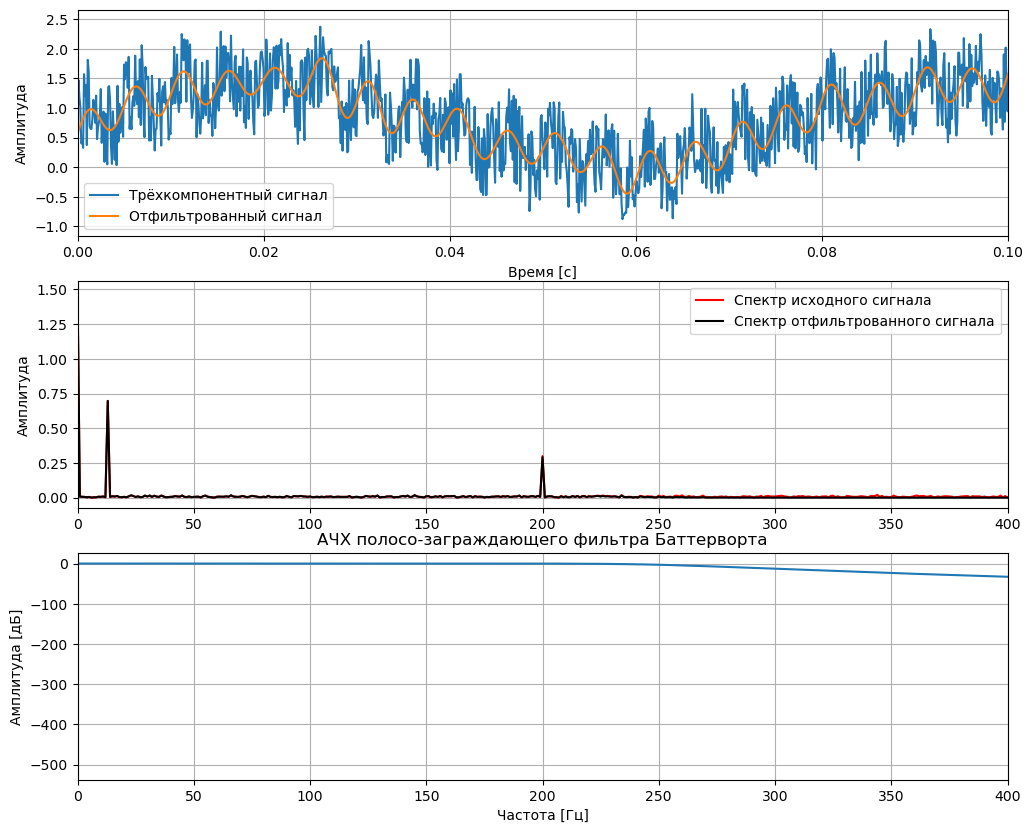

In [5]:
## полосо-заграждающий фильтр
b, a = signal.butter(8, [250], btype='lowpass', fs=Fs)
df['y_filt'] = signal.filtfilt(b, a, df.y)

## АЧХ фильтра
w, h = signal.freqz(b, a)
w = Fs/np.pi/2 * w ## переводим радианы в Герцы

N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)[range(int(N/2))]

## делаем преобразование Фурье
Y_filt = 2/N * np.fft.fft(df.y_filt)[range(int(N/2))]

## визуализируем
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
ax[0].plot(df.t, df.y)
ax[0].plot(df.t, df.y_filt)
#ax[0].plot(df.t, df.y_desired, '--')
ax[0].legend(['Трёхкомпонентный сигнал', 'Отфильтрованный сигнал', 'Двухкомпонентный сигнал'])
ax[0].set_xlim([0, 0.1])
ax[0].set_xlabel('Время [c]')
ax[0].set_ylabel('Амплитуда')
ax[0].grid()

ax[1].plot(frq, abs(Y), 'r')
ax[1].plot(frq, abs(Y_filt), c='k') 
ax[1].legend(['Спектр исходного сигнала', 'Спектр отфильтрованного сигнала'])
# ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
ax[1].set_xlim([0, 400])
ax[1].grid()

ax[2].plot(w, 20 * np.log10(abs(h)))
ax[2].set_xlim([0, 400])
# ax[2].set_ylim([-35, 1])
ax[2].set_ylabel('Амплитуда [дБ]')
ax[2].set_xlabel('Частота [Гц]')
ax[2].set_title('АЧХ полосо-заграждающего фильтра Баттерворта')
ax[2].grid()

print(np.where((w > 253) & (w < 255))[0])
print(20 * np.log10(abs(h[26])))
print(abs(df.y_filt).mean())

In [6]:
b, a = signal.cheby2(N=4, Wn=[30], rs=40, btype='highpass', fs=Fs)
df['y_filt_c2'] = signal.filtfilt(b, a, df.y)

## АЧХ фильтра
w, h = signal.freqz(b, a)
w = Fs/np.pi/2 * w ## переводим радианы в Герцы


print(np.where((w > 28) & (w < 30))[0])
print(20 * np.log10(abs(h[3])))
print(abs(df.y_filt_c2).mean())

[3]
-43.78778437617848
0.40010274696292414
